### 1. Rolx algorithm

In [26]:
import warnings
from pprint import pprint

import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

from graphrole import RecursiveFeatureExtractor, RoleExtractor

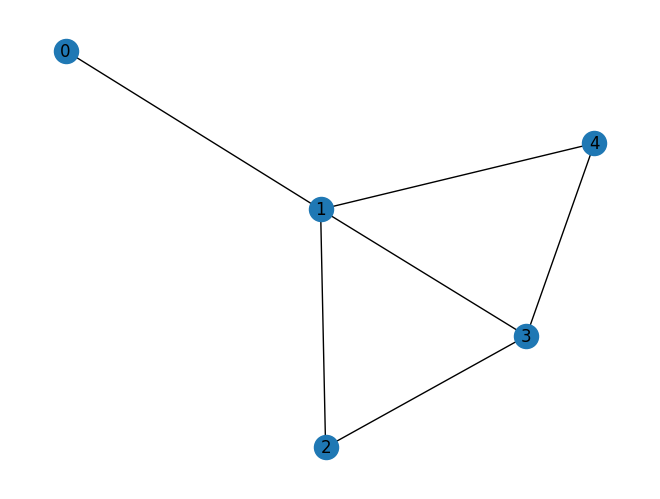

In [27]:
G = nx.Graph()
# add node/edge pairs
G.add_edges_from([(0, 1),
                   (1, 2),(1, 4),(1,3),(2, 3),(3, 4)])
nx.draw(G,with_labels = True)

In [28]:
# extract features from 1 recursive generations:
feature_extractor = RecursiveFeatureExtractor(G)
features = feature_extractor.extract_features()

print(f'\nFeatures extracted from {feature_extractor.generation_count} recursive generations:')
print(features)


Features extracted from 1 recursive generations:
   degree  external_edges
0       1               3
1       4               0
2       2               3
3       3               1
4       2               3


In [12]:
# assign node roles
role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)
node_roles = role_extractor.roles

print('\nNode role assignments:')
pprint(node_roles)

print('\nNode role membership by percentage:')
print(role_extractor.role_percentage.round(2))


Node role assignments:
{0: 'role_1', 1: 'role_0', 2: 'role_1', 3: 'role_0', 4: 'role_1'}

Node role membership by percentage:
   role_0  role_1
0    0.03    0.97
1    0.97    0.03
2    0.25    0.75
3    0.69    0.31
4    0.25    0.75


### 2. Learning with Local and Global Consistency

In [23]:
from networkx.algorithms import node_classification
G = nx.path_graph(4)
G.nodes[0]['label'] = 'A'
G.nodes[3]['label'] = 'B'
G.nodes(data=True)

G.edges()

predicted = node_classification.local_and_global_consistency(G)
predicted

['A', 'A', 'B', 'B']

In [24]:
#draw graph with different labeled nodes
def draw_graph(G):
    clubs = []  # list to populate with labels
    for n in G.nodes:
        c = G.nodes[n]['label']
        col = 0
        if c=='A':
            clubs.append('green')
        elif c =='B':
            clubs.append('red')
        else:
            clubs.append('black')
    pos = nx.spring_layout(G, seed=42) # To be able to recreate the graph layout
    nx.draw_networkx(G, pos=pos, node_color = clubs) # Plot the graph

### 3. Label propagation

In [ ]:
G = nx.Graph()
# add node/edge pairs
G.add_edges_from([(0, 1),(0, 2),(0, 3),(0, 5),(1, 3), (1, 6),(3, 4),(4, 5),(4, 7),(4,8),(7,8)])


G.nodes[0]['label'] = 'A'
G.nodes[1]['label'] = 'A'
G.nodes[2]['label'] = ''
G.nodes[3]['label'] = 'A'
G.nodes[4]['label'] = 'B'
G.nodes[5]['label'] = 'B'
G.nodes[6]['label'] = 'A'
G.nodes[7]['label'] = 'B'
G.nodes[8]['label'] = 'B'

In [ ]:
draw_graph(G)

In [ ]:
predicted = node_classification.local_and_global_consistency(G)
predicted

In [ ]:
for i in range(len(G.nodes)):
    if G.nodes[i]['label']=='':
        G.nodes[i]['label']= predicted[i]

draw_graph(G)

In [15]:
G = nx.Graph()
# add node/edge pairs
G.add_edges_from([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), 
 (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16)])


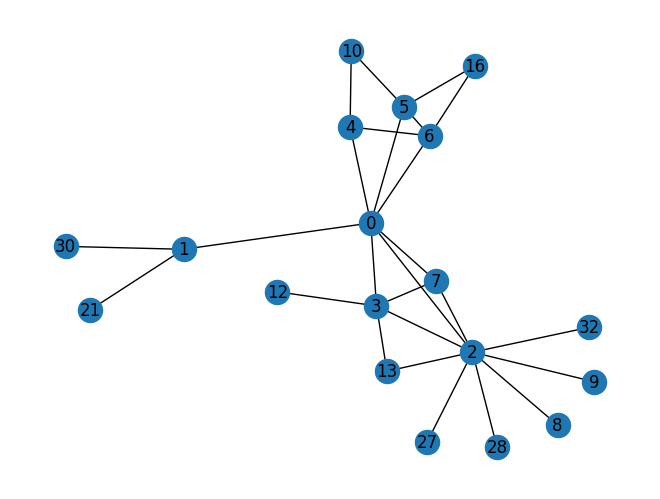

In [16]:
nx.draw(G,with_labels = True)

In [17]:
# Import libraries
import pandas as pd #For reading dataset files
import networkx as nx #For network creation/analysis
from networkx.algorithms import community
import community as community_louvain
import matplotlib.pyplot as plt #For plotting graphs
import igraph as ig
%matplotlib inline

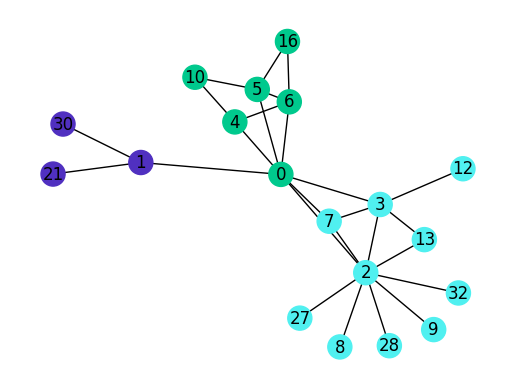

In [18]:
colors = ["#00C98D", "#5030C0", "#50F0F0"]
pos = nx.spring_layout(G)
lst_m = community.label_propagation_communities(G)
color_map_b = {}
keys = G.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values
counter = 0
for c in lst_m:
  for n in c:
    color_map_b[n] = colors[counter]
  counter = counter + 1
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()